# 2.Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Importing CSV File

In [3]:
ls

 Volume in drive C is ssd
 Volume Serial Number is 344C-651C

 Directory of C:\Users\phoneclicker\Downloads\excelr_kd\ASSIGNMENT\Random Forest

01/05/2023  10:40 AM    <DIR>          .
01/05/2023  10:40 AM    <DIR>          ..
01/05/2023  09:35 AM    <DIR>          .ipynb_checkpoints
11/29/2022  03:33 PM            17,023 Company_Data.csv
11/29/2022  03:33 PM            21,837 Fraud_check.csv
11/29/2022  03:33 PM             1,378 problem statement(company data).txt
11/29/2022  03:33 PM               133 Problem_statement(Fraudcheck).txt
01/05/2023  10:40 AM            74,845 Random_Forest,Company-15.ipynb
01/05/2023  10:40 AM            69,827 Random_Forest,Fraud-15.ipynb
               6 File(s)        185,043 bytes
               3 Dir(s)  23,076,446,208 bytes free


In [4]:
company=pd.read_csv("Company_Data.csv")

# Converting sales data into 3 categories Low, High, Medium by Making sales columns

In [5]:
bins = np.linspace(min(company['Sales']), max(company['Sales']),4)
bins

array([ 0.        ,  5.42333333, 10.84666667, 16.27      ])

In [6]:
label_names = ['Low', 'Medium', 'High']

In [7]:
company['Sales_bin'] = pd.cut(company['Sales'], bins, labels=label_names, include_lowest=True )
company[['Sales','Sales_bin']].head(10)

,Sales,Sales_bin
0,9.50,Medium
1,11.22,High
2,10.06,Medium
3,7.40,Medium
4,4.15,Low
5,10.81,Medium
6,6.63,Medium
7,11.85,High
8,6.54,Medium
9,4.69,Low


In [8]:
company.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium


# EDA

In [9]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [10]:
company["US"].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [11]:
company["Urban"].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [12]:
company["ShelveLoc"].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [13]:
company.shape

(400, 12)

In [14]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [15]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_bin    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [16]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
Sales_bin      0
dtype: int64

# Feature Engineering

In [17]:

company=company.drop(("Sales"),axis=1)

In [18]:
company.head(4)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium


# Using label Encoding

In [19]:
company.head(3)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium


In [20]:
label_encoder = preprocessing.LabelEncoder()

In [22]:
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 
company['Urban']= label_encoder.fit_transform(company['Urban'])
company['US']= label_encoder.fit_transform(company['US']) 
company['Sales_bin']=label_encoder.fit_transform(company['Sales_bin'])

In [23]:
company.head(4)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,2
3,117,100,4,466,97,2,55,14,1,1,2


In [24]:
company.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [25]:
company.Urban.value_counts()

1    282
0    118
Name: Urban, dtype: int64

In [26]:
company.US.value_counts()

1    258
0    142
Name: US, dtype: int64

# Splitting Trai-Test Data

In [27]:
X=company.iloc[:,0:-1]
y=company.iloc[:,-1]

In [28]:
X.shape

(400, 10)

In [29]:
y.shape

(400,)

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [31]:
X_train.shape

(268, 10)

In [32]:
y_train.shape

(268,)

In [33]:
X_test.shape

(132, 10)

In [35]:
y_train.shape

(268,)

# Building Random Forest Classification Model

In [36]:
num_trees = 100
max_features = 6
first_model = RandomForestClassifier(n_estimators=num_trees,max_features=max_features)

In [37]:
# Evaluate the base model(without hypertuning)

from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10,shuffle=True)
result = cross_val_score(first_model, X_train, y_train,cv=cv)

print("Accuracy is:",np.mean(result))

Accuracy is: 0.7460113960113961


In [38]:
# Iterating over a range of folds in StratifiedKFold
mean_accuracy=[]
n_folds=[]

for i in range(2,15):
    cv2=StratifiedKFold(n_splits=i,shuffle=True,random_state=20)
    result = cross_val_score(first_model, X_train, y_train, cv=cv2)
    avg=np.mean(result)
    mean_accuracy.append(avg)
    n_folds.append(i)

<AxesSubplot:>

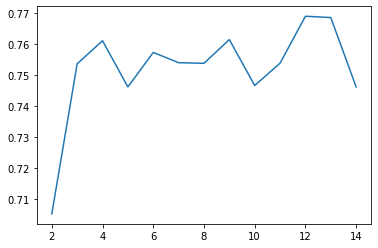

In [39]:
## Visualizing the scores generated for each number of folds

import seaborn as sns
sns.lineplot(x=n_folds,y=mean_accuracy)

# Fitting the model

In [40]:
first_model.fit(X_train,y_train)
first_model.feature_importances_

array([0.12473975, 0.08075575, 0.08058127, 0.10999654, 0.24604466,
       0.19160454, 0.0979912 , 0.04185702, 0.01341073, 0.01301853])

#  finding the important features

In [42]:
cols=['CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban','US']
feature_imp=pd.Series(first_model.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

Price          0.246045
ShelveLoc      0.191605
CompPrice      0.124740
Population     0.109997
Age            0.097991
Income         0.080756
Advertising    0.080581
Education      0.041857
Urban          0.013411
US             0.013019
dtype: float64

# Visualization

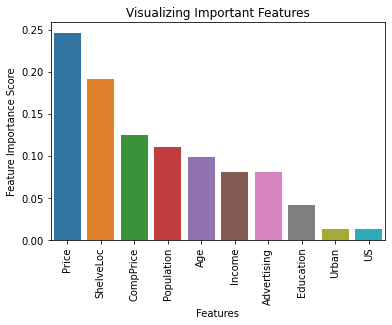

In [43]:
# Creating a bar plot
sns.barplot(y=feature_imp, x=feature_imp.index)
# Add labels to your graph
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=90)

plt.title("Visualizing Important Features")
plt.show()

# Predicting on test data

In [44]:
#Predicting on test data
pred_first = first_model.predict(X_test) 
pd.Series(pred_first).value_counts()

2    101
1     26
0      5
dtype: int64

# Accuracy

In [45]:
from sklearn import metrics
metrics.accuracy_score(pred_first,y_test)

0.6590909090909091

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_first))

              precision    recall  f1-score   support

           0       0.40      0.11      0.17        18
           1       0.54      0.50      0.52        28
           2       0.70      0.83      0.76        86

    accuracy                           0.66       132
   macro avg       0.55      0.48      0.48       132
weighted avg       0.63      0.66      0.63       132



In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_first)

array([[ 2,  0, 16],
       [ 0, 14, 14],
       [ 3, 12, 71]], dtype=int64)